In [2]:
from datasets import load_dataset
import pandas as pd
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, processors
from tokenizers.normalizers import NFKC
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.models import BPE
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import re

/home/careinfolab/Dr_Luo/Rohan/rohanj/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
ds = load_dataset("damerajee/english-to-hindi-l")

In [1]:
ds['train'].to_csv('/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Dataset/eng_hindi.csv', index=False)

NameError: name 'ds' is not defined

In [3]:
df = pd.read_csv('/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Dataset/eng_hindi.csv')

In [4]:
df.describe()

,english_sentence,hindi_sentence
count,1786064,1780733
unique,1165072,1145927
top,(Laughter),Name
freq,615,1093


In [5]:
df.head(10)

,english_sentence,hindi_sentence
0,When it is said to him: 'Fear Allah' egotism t...,"और जब उससे कहा जाता है, ""अल्लाह से डर"", तो अहं..."
1,This profile exists already.,यह प्रोफ़ाइल पहले से ही है.
2,Halo with Ornamental Borde,विवरण: एक पारंपरिक कमल के फूल के साथ पत्थर की ...
3,and the jinn We had created before from flamin...,और हम ही ने जिन्नात को आदमी से (भी) पहले वे धु...
4,"Ladies and Gentlemen, the Government of India ...",शहरीकरण की तेज गति के साथ अवसंरचना और सेवाओं क...
5,"Have you then considered Al - Lat, and Al - 'U...",तो क्या तुमने लात और उज़्ज़ा
6,Escalation in demand will provide traders an o...,मांग में वृद्धि व्यापारियों को कीमतें बढाने का...
7,He understood the pity and the beauty of life ...,वे जीवन में अनुकम्पा और सौन्दर्य के महत्व को स...
8,Fast Track Court - The Additional Sessions Cou...,फास्ट ट्रेक कोर्ट-ये अतिरिक्त सत्र न्यायालय है...
9,He was working as a quality controller in the ...,वह खाद्य उत्पादन कारखाने में गुणवत्ता नियंत्रक...


In [6]:
df.isna().sum()

english_sentence     724
hindi_sentence      6055
dtype: int64

In [7]:
df = df[df['english_sentence'].apply(lambda x: isinstance(x, str)) & df['hindi_sentence'].apply(lambda x: isinstance(x, str))]
print(df.isna().sum())
print(df[['english_sentence', 'hindi_sentence']].head(10))


english_sentence    0
hindi_sentence      0
dtype: int64
                                    english_sentence  \
0  When it is said to him: 'Fear Allah' egotism t...   
1                       This profile exists already.   
2                         Halo with Ornamental Borde   
3  and the jinn We had created before from flamin...   
4  Ladies and Gentlemen, the Government of India ...   
5  Have you then considered Al - Lat, and Al - 'U...   
6  Escalation in demand will provide traders an o...   
7  He understood the pity and the beauty of life ...   
8  Fast Track Court - The Additional Sessions Cou...   
9  He was working as a quality controller in the ...   

                                      hindi_sentence  
0  और जब उससे कहा जाता है, "अल्लाह से डर", तो अहं...  
1                       यह प्रोफ़ाइल पहले से ही है.   
2  विवरण: एक पारंपरिक कमल के फूल के साथ पत्थर की ...  
3  और हम ही ने जिन्नात को आदमी से (भी) पहले वे धु...  
4  शहरीकरण की तेज गति के साथ अवसंरचना और सेवाओं क..

In [8]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[^\w\s]', '', text) 
    return text.strip()

In [9]:
df['english_sentence'] = df['english_sentence'].apply(clean_text)
df['hindi_sentence'] = df['hindi_sentence'].apply(clean_text)

In [10]:
df[['english_sentence', 'hindi_sentence']].head(10)

,english_sentence,hindi_sentence
0,When it is said to him Fear Allah egotism take...,और जब उसस कह जत ह अललह स डर त अहकर उस और गनह प...
1,This profile exists already,यह परफइल पहल स ह ह
2,Halo with Ornamental Borde,ववरण एक परपरक कमल क फल क सथ पतथर क पटय उस पर ख...
3,and the jinn We had created before from flamin...,और हम ह न जननत क आदम स भ पहल व धए क तज आग स पद कय
4,Ladies and Gentlemen the Government of India p...,शहरकरण क तज गत क सथ अवसरचन और सवओ क नरमण म रजय...
5,Have you then considered Al Lat and Al Uzza ...,त कय तमन लत और उजज
6,Escalation in demand will provide traders an o...,मग म वदध वयपरय क कमत बढन क अवसर परदन करत ह
7,He understood the pity and the beauty of life ...,व जवन म अनकमप और सनदरय क महतव क समझत थ और सवय ...
8,Fast Track Court The Additional Sessions Cour...,फसट टरक करटय अतरकत सतर नययलय ह इनक गठन दरघवध स...
9,He was working as a quality controller in the ...,वह खदय उतपदन करखन म गणवतत नयतरक क तर पर करय कर...


In [11]:
df.describe()

,english_sentence,hindi_sentence
count,1780675,1780675
unique,1129342,1007644
top,Laughter,Name
freq,619,1093


In [12]:
def clean_dataframe(df, src_col="english_sentence", tgt_col="hindi_sentence"):
    mask = df[src_col].apply(lambda x: isinstance(x, str)) & df[tgt_col].apply(lambda x: isinstance(x, str))
    cleaned_df = df[mask].copy().reset_index(drop=True)
    print(f"Cleaned dataframe: {len(df) - len(cleaned_df)} rows removed due to non-string entries.")
    return cleaned_df

df = clean_dataframe(df).reset_index(drop=True)


Cleaned dataframe: 0 rows removed due to non-string entries.


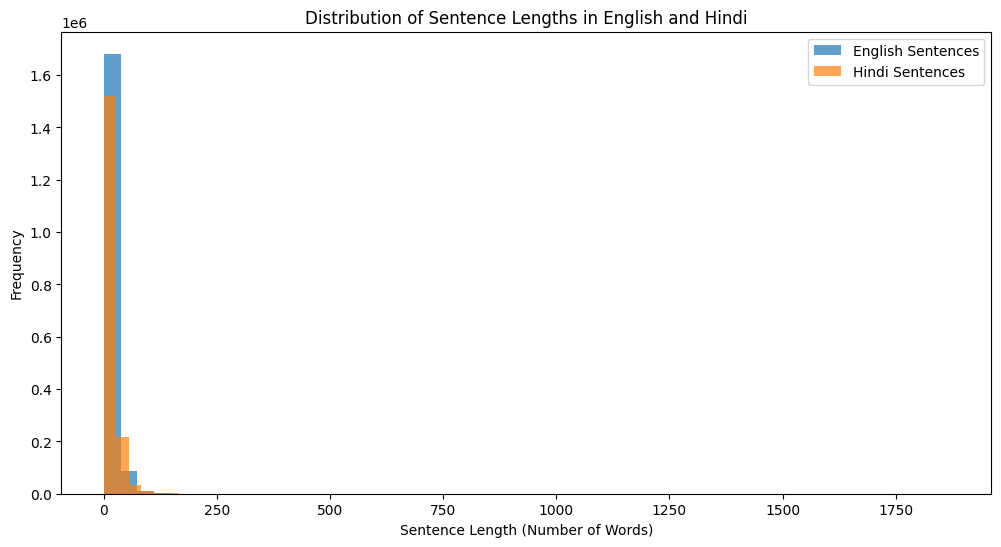

In [13]:
en_lengths = df['english_sentence'].apply(lambda x: len(x.split()))
hi_lengths = df['hindi_sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(en_lengths, bins=50, alpha=0.7, label='English Sentences')
plt.hist(hi_lengths, bins=50, alpha=0.7, label='Hindi Sentences')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Sentence Lengths in English and Hindi')
plt.show()


In [14]:
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [15]:
english_data = df['english_sentence'].tolist()
hindi_data = df['hindi_sentence'].tolist()

en_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
en_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

hi_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
hi_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

special_tokens = ["[PAD]", "[UNK]", "[SOS]", "[EOS]"]

en_trainer = trainers.BpeTrainer(vocab_size=50000, min_frequency=2, show_progress=True, special_tokens=special_tokens)

hi_trainer = trainers.BpeTrainer(vocab_size=50000, min_frequency=2, show_progress=True, special_tokens=special_tokens)

en_tokenizer.train_from_iterator(english_data, trainer=en_trainer)

hi_tokenizer.train_from_iterator(hindi_data, trainer=hi_trainer)

en_tokenizer.save("custom_en_tokenizer.json")  
hi_tokenizer.save("custom_hi_tokenizer.json") 

In [16]:
df.columns

Index(['english_sentence', 'hindi_sentence'], dtype='object')

In [17]:
def get_max_length(data, tokenizer):
    max_len = 0
    for sentence in data:
        encoded = tokenizer.encode(sentence)
        max_len = max(max_len, len(encoded.ids)) 
    return max_len

max_len_en = get_max_length(english_data, en_tokenizer)
print(f"Max length for English: {max_len_en}")

max_len_hi = get_max_length(hindi_data, hi_tokenizer)
print(f"Max length for Hindi: {max_len_hi}")


Max length for English: 384
Max length for Hindi: 420


In [18]:
df.isna().sum()

english_sentence    0
hindi_sentence      0
dtype: int64

In [19]:
df.to_csv('/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Dataset/eng_hindi_cleaned.csv', index=False)